<a href="https://colab.research.google.com/github/jesminmousumy/Python-Programming/blob/main/Delivery_Improvement_Operation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import some libraries
import pandas as pd

data =pd.read_csv('logistics_data.csv')
print(data.head())

   Order_ID Vehicle_ID Delivery_Location  Distance  Delivery_Time     Status  \
0         1         V1        Location_A         5            1.2  Completed   
1         2         V2        Location_B         6            1.4     Failed   
2         3         V3        Location_C         7            1.6  Completed   
3         4         V4        Location_D         8            1.2  Completed   
4         5         V5        Location_E         9            1.4     Failed   

            Time_Stamp  
0  2024-12-01 00:00:00  
1  2024-12-01 01:00:00  
2  2024-12-01 02:00:00  
3  2024-12-01 03:00:00  
4  2024-12-01 04:00:00  


In [6]:
print(data.isnull().sum())   #missing values

data_clean = data.dropna(subset=['Distance','Delivery_Time','Status'])
data_clean = data_clean[data_clean['Status'] != 'Failed']

data_clean['Time_Stamp'] = pd.to_datetime(data_clean['Time_Stamp'])

print(data_clean.head())



Order_ID             0
Vehicle_ID           0
Delivery_Location    0
Distance             0
Delivery_Time        0
Status               0
Time_Stamp           0
dtype: int64
   Order_ID Vehicle_ID Delivery_Location  Distance  Delivery_Time     Status  \
0         1         V1        Location_A         5            1.2  Completed   
2         3         V3        Location_C         7            1.6  Completed   
3         4         V4        Location_D         8            1.2  Completed   
5         6         V1        Location_F        10            1.6  Completed   
7         8         V3        Location_H        12            1.4  Completed   

           Time_Stamp  
0 2024-12-01 00:00:00  
2 2024-12-01 02:00:00  
3 2024-12-01 03:00:00  
5 2024-12-01 05:00:00  
7 2024-12-01 07:00:00  


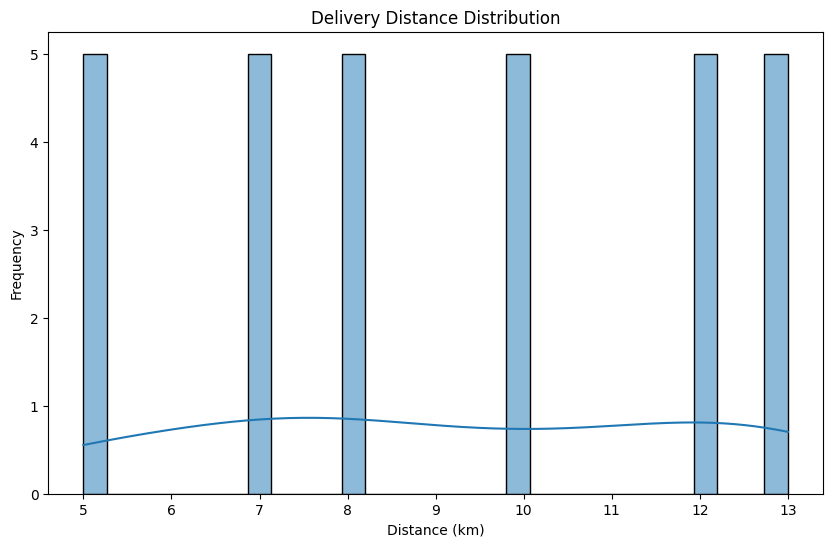

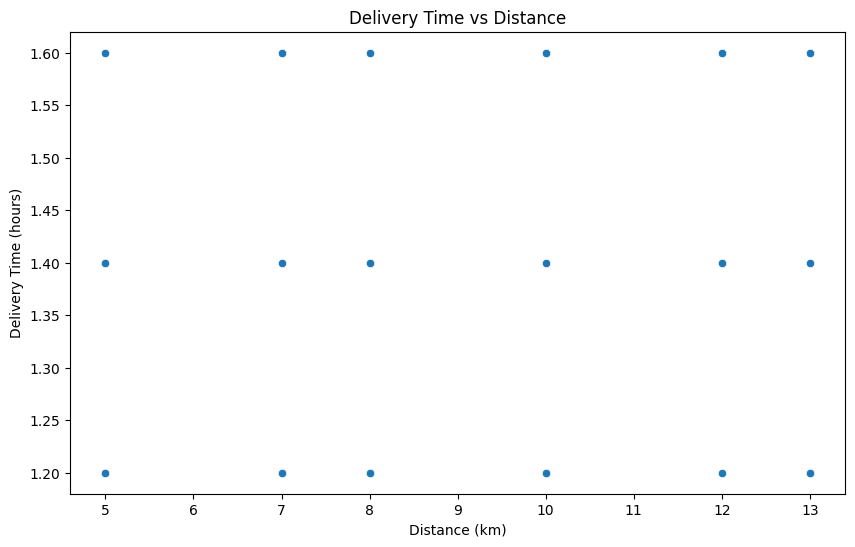

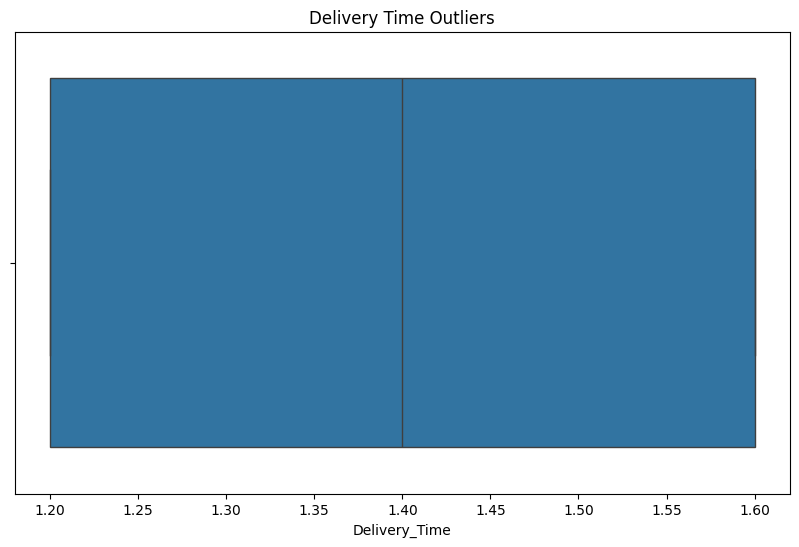

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

#Visulizing the distributation of delivery distances
plt.figure(figsize=(10,6))
sns.histplot(data_clean['Distance'],kde=True,bins=30)
plt.title("Delivery Distance Distribution")
plt.xlabel("Distance (km)")
plt.ylabel("Frequency")
plt.show()

#Relationships between distance and delivery time
plt.figure(figsize=(10,6))
sns.scatterplot(x=data_clean['Distance'],y=data_clean['Delivery_Time'])
plt.title("Delivery Time vs Distance")
plt.xlabel("Distance (km)")
plt.ylabel("Delivery Time (hours)")
plt.show()

#Checking for outliers in delivery time
plt.figure(figsize=(10,6))
sns.boxplot(x=data_clean['Delivery_Time'])
plt.title("Delivery Time Outliers")
plt.show()



  Vehicle_ID  avg_delivery_time  total_distance
1         V3               1.42              95
0         V1               1.38              75
2         V4               1.38             105


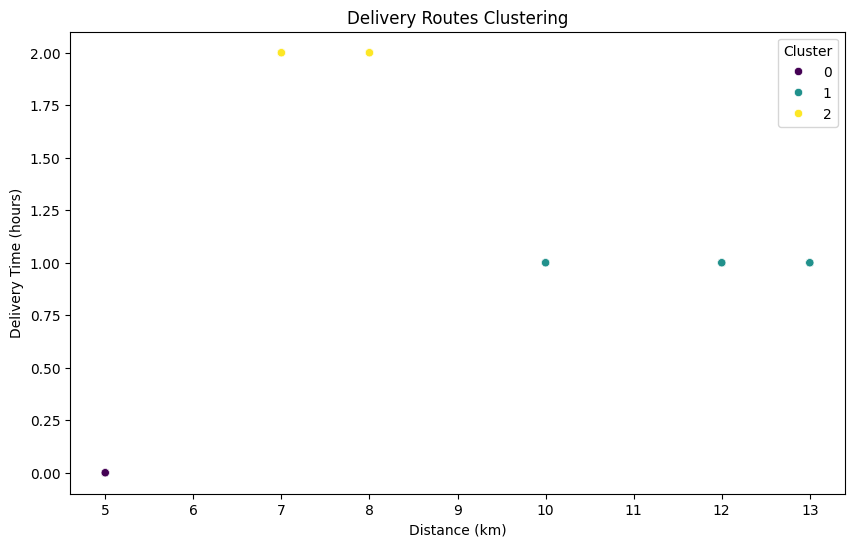

In [9]:
#Grouping by vehicle to find delivery time performance
vehicle_performance = data_clean.groupby('Vehicle_ID').agg(
    avg_delivery_time=('Delivery_Time','mean'),
    total_distance=('Distance','sum')
).reset_index()



#Sorting vehicles by their performance
vehicle_performance_sorted = vehicle_performance.sort_values(by='avg_delivery_time',ascending=False)
print(vehicle_performance_sorted)

#Clustering delivery addresses by geographical location
from sklearn.cluster import KMeans


k_means = KMeans(n_clusters=3)
data_clean['Cluster'] = k_means.fit_predict(data_clean[['Distance']])

#Visualizing the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x=data_clean['Distance'],y=data_clean['Cluster'],hue=data_clean['Cluster'],palette='viridis')
plt.title("Delivery Routes Clustering")
plt.xlabel("Distance (km)")
plt.ylabel("Delivery Time (hours)")
plt.show()



